In [74]:
import seaborn as sns
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import statistics as stat
from scipy.stats import iqr, shapiro, normaltest, mannwhitneyu

In [15]:
path = 'filtered data/'

df_demo = pd.read_csv(path + "control_demographic_data.csv")
df_demo.set_index("subject_no", inplace=True)
df_demo.head()

,gender,age,education,occupation,family_history
subject_no,,,,,
1,F,23,H,NPS,Not to the extent of knowledge
2,F,21,H,NPS,Not to the extent of knowledge
3,F,33,H,P,Grandmother has late onset parkinsons
4,F,24,H,NPS,Grandmother has alzheimers
5,M,25,H,NPS,Not to the extent of knowledge


In [23]:
mean_at20 = []
std_at20 = []
median_at20 = []
iqr_at20 = []
mean_is20 = []
std_is20 = []
median_is20 = []
iqr_is20 = []
ks20 = []

for i in range (1,31):
    df = pd.read_csv(path + 's' + str(i) + '_r.csv')
    at20_column = "at20_s" + str(i) + "_r"
    is20_column = "is20_s" + str(i) + "_r"

    mean_at20.append(df[at20_column].mean())
    std_at20.append(df[at20_column].std())
    median_at20.append(df[at20_column].median())
    iqr_at20.append(iqr(df[at20_column]))
    
    mean_is20.append(df[is20_column].mean())
    std_is20.append(df[is20_column].std())
    median_is20.append(df[is20_column].median())
    iqr_is20.append(iqr(df[is20_column]))

    ks20.append(len(df))


In [62]:
dataframe = {'mean_at20': mean_at20, 
             'std_at20': std_at20,
             'median_at20': median_at20,
             'iqr_at20': iqr_at20,
             'mean_is20': mean_is20,
             'std_is20': std_is20,
             'median_is20': median_is20,
             'iqr_is20': iqr_is20,
             'ks20': ks20,
             'gender': df_demo["gender"],
             'age': df_demo["age "]
             }
df = pd.DataFrame(dataframe)
df.tail()

,mean_at20,std_at20,median_at20,iqr_at20,mean_is20,std_is20,median_is20,iqr_is20,ks20,gender,age
subject_no,,,,,,,,,,,
26,43.669014,16.688095,45.0,17.00,119.704225,17.509385,118.5,16.75,142,M,40
27,63.493151,15.699878,63.0,17.75,102.938356,19.493314,101.0,17.00,146,F,34
28,70.696970,12.495458,70.5,16.25,100.583333,12.638268,102.0,17.00,132,M,22
29,81.220183,23.713708,77.0,25.00,123.724771,27.754169,120.0,23.00,109,M,32
30,85.018868,16.432825,83.0,19.00,120.216981,14.969814,119.0,18.75,106,M,45


## Playing around with the data

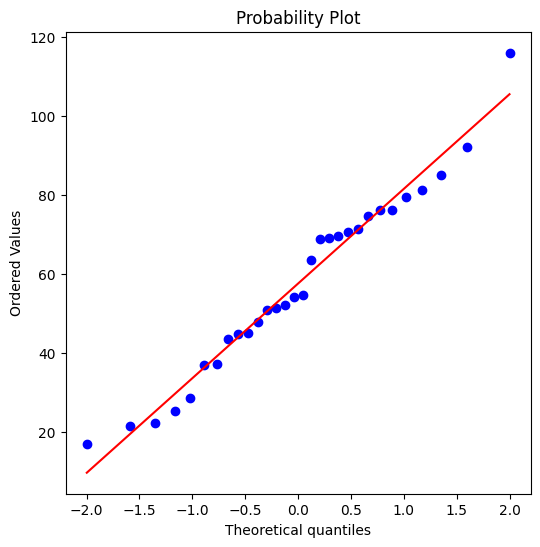

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(6,6))
stats.probplot(df["mean_at20"], dist= "norm", plot = plt)
plt.show()

array([[<Axes: title={'center': 'at20_s15_r'}>,
        <Axes: title={'center': 'is20_s15_r'}>]], dtype=object)

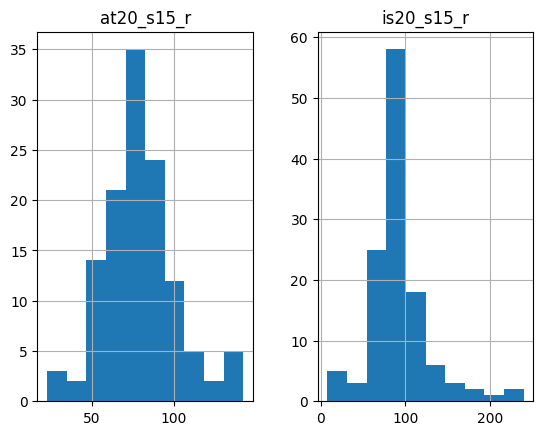

In [58]:
test_df = pd.read_csv(path + "s15_r.csv")
test_df.hist()

In [61]:
stat, p_value = normaltest(test_df["at20_s15_r"])
p_value

np.float64(0.02062337051870624)

In [66]:
df["mean_at20"].std()

np.float64(23.32825601278695)

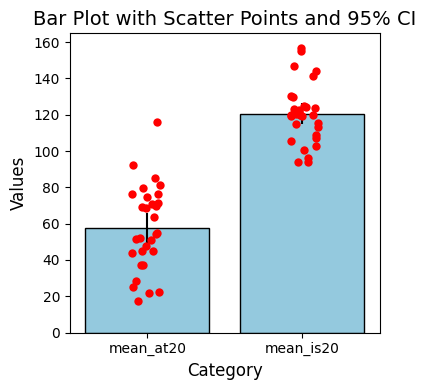

In [77]:
# Reshape the DataFrame for plotting
df_melted = df[['mean_at20', 'mean_is20']].melt(var_name='Category', value_name='Values')

# Group by 'Category' to calculate the mean and 95% CI
summary_stats = df_melted.groupby('Category')['Values'].agg(['mean', 'count', 'std']).reset_index()
summary_stats['ci_lower'] = summary_stats['mean'] - 1.96 * (summary_stats['std'] / np.sqrt(summary_stats['count']))
summary_stats['ci_upper'] = summary_stats['mean'] + 1.96 * (summary_stats['std'] / np.sqrt(summary_stats['count']))

# Plot
plt.figure(figsize=(4, 4))

# Bar plot with error bars for 95% CI
sns.barplot(
    x='Category', y='mean', data=summary_stats,
    yerr=summary_stats['ci_upper'] - summary_stats['mean'],
    color='skyblue', edgecolor='black'
)

# Overlay scatter points
sns.stripplot(
    x='Category', y='Values', data=df_melted,
    color='red', jitter=True, size=6, edgecolor="black"
)

# Add labels and title
plt.xlabel("Category", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Bar Plot with Scatter Points and 95% CI", fontsize=14)
plt.tight_layout()

plt.show()

In [72]:
p_df = pd.read_csv("filtered data/pt_r.csv")
p_df.head()

,Unnamed: 0,p_at20,p_is20
0,0,117.424097,99.465062
1,1,133.624544,155.081955
2,2,130.547623,118.041866
3,3,143.988372,72.829668
4,4,116.760344,141.780913


In [76]:
stat, p_value = mannwhitneyu(df["mean_at20"], p_df["p_at20"])
p_value

np.float64(3.52539509013505e-05)